##Uitility notebook for CUSP PUI2015
written by fbb

Wage Gap regression model


In [2]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl

import json
import os
s = json.load( open(os.getenv('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

from IPython.core.display import HTML
def css_styling():
    styles = open("/Users/fbianco/.ipython/profile_default/static/custom/custom.css", "r").read() #or edit path to custom.css
    return HTML(styles)
css_styling()


%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

unfortunately a lot of the links that i originally used a few weeks ago are broken now. I posted the data on the class webpage tho.

In [4]:
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)



In [5]:
allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)


##exploratory phase

In [6]:
#print males.keys()
#print allmales['all'].keys()[0], allmales['all'][allmales['all'].keys()[0]]

from pandas.tools.plotting import scatter_matrix
print allmales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

0                                                   NaN
1                                             ....Total
2                                              Earnings
3                                    ..Wages and Salary
4                             ..Nonfarm Self-Employment
5                                ..Farm Self-Employment
6                                       Social Security
7                    SSI (Supplemental Security Income)
8                                     Public Assistance
9                                     Veterans Benefits
10                                    Survivor Benefits
11                                  Disability Benefits
12                            Unemployment Compensation
13                                 Workers Compensation
14                                      Property Income
15                                           ..Interest
16                                          ..Dividends
17                ..Rents, Royalties, Estates or

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111eb0390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1139a9a10>]], dtype=object)

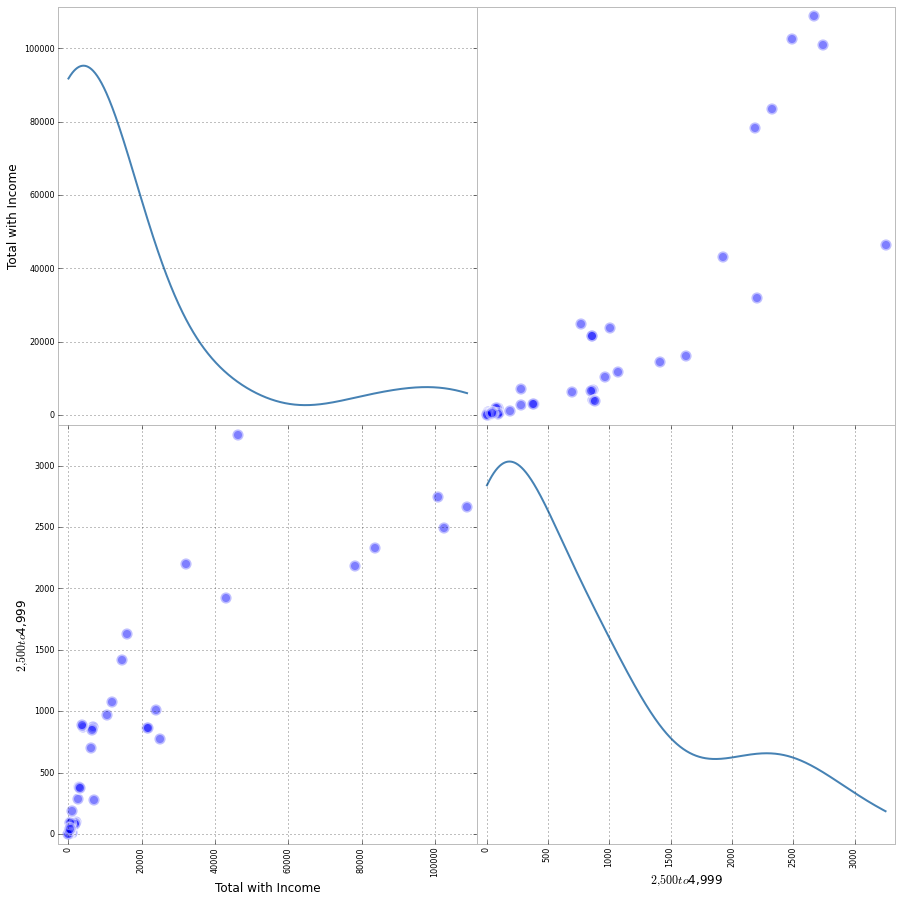

In [13]:
print  allmales['all'][u'Characteristic']
scatter_matrix(allmales['all'][[u'Total with Income',
                                u'$2,500 to $4,999',u'Median income',u'Gini ratio']], 
               figsize=(15,15), linewidth= 3, s=500, diagonal='kde')

/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113e4f650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x115907e90>]], dtype=object)

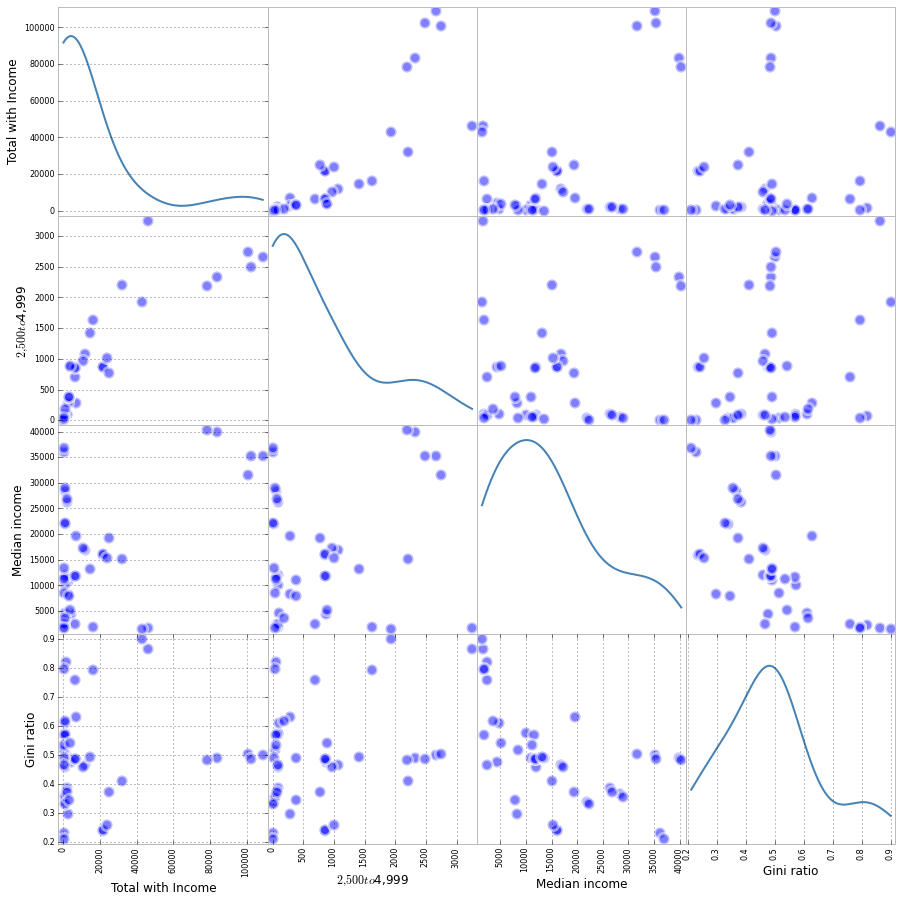

In [14]:


for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)
scatter_matrix(allmales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), diagonal='kde')


/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115953550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116b290d0>]], dtype=object)

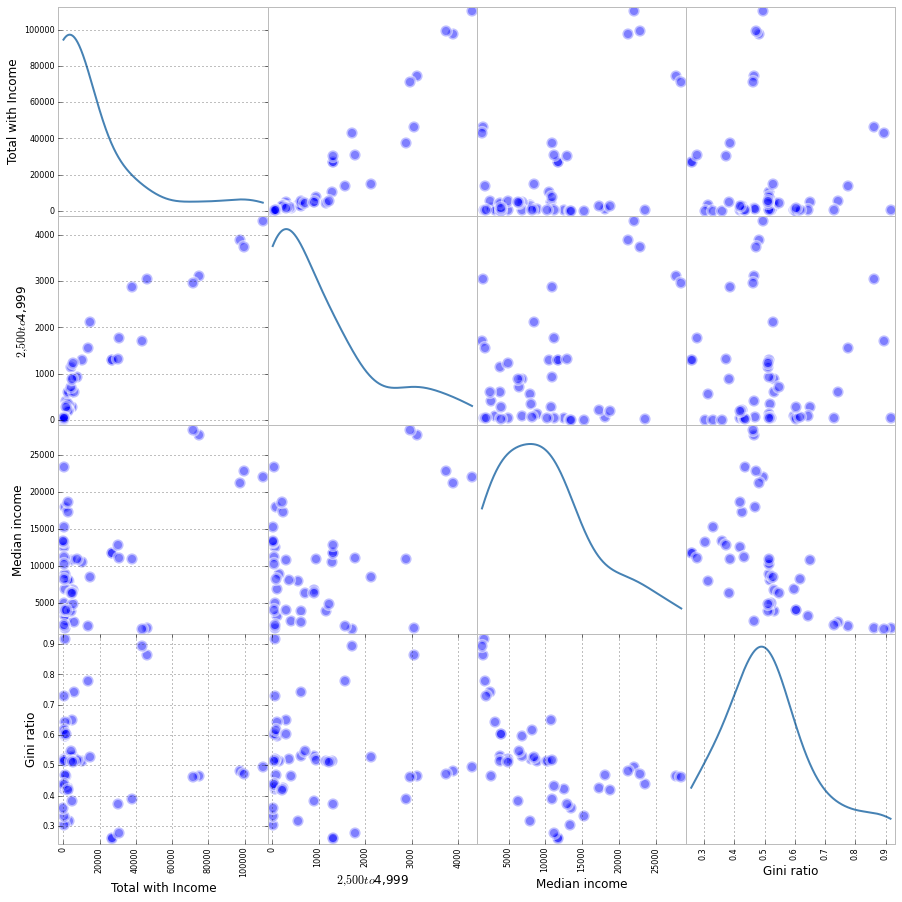

In [15]:
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)
scatter_matrix(allfemales['all']
                   [[u'Total with Income',u'$2,500 to $4,999',u'Median income',u'Gini ratio']], 
               linewidth= 3, s=500, figsize=(15,15), diagonal='kde')


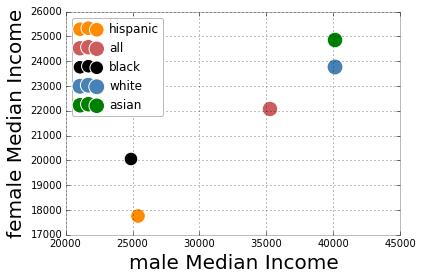

In [21]:
col={'all':'IndianRed','white':'SteelBlue','black':'black','hispanic':'DarkOrange','asian':'green'}
for k in col.iterkeys():
    pl.scatter(allmales[k]['Median income'][1],allfemales[k]['Median income'][1],s=150*allmales[k]['Median income'][1]/allfemales[k]['Median income'][1],c=col[k],label=k)
pl.xlabel('male Median Income',fontsize=20)
pl.ylabel('female Median Income',fontsize=20)
pl.legend(loc=2)


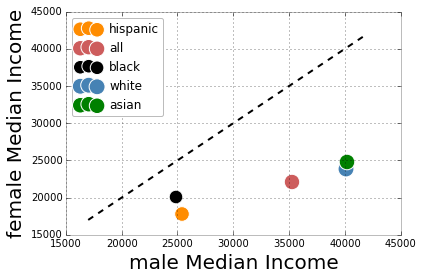

In [23]:
col={'all':'IndianRed','white':'SteelBlue','black':'black','hispanic':'DarkOrange','asian':'green'}
for k in col.iterkeys():
    pl.scatter(allmales[k]['Median income'][1],allfemales[k]['Median income'][1],s=150*allmales[k]['Median income'][1]/allfemales[k]['Median income'][1],c=col[k],label=k)
pl.plot([17000,42000],[17000,42000],'k--')
pl.xlabel('male Median Income',fontsize=20)
pl.ylabel('female Median Income',fontsize=20)
pl.legend(loc=2)

Slope:  0.59, 0.59, 0.59 0.57


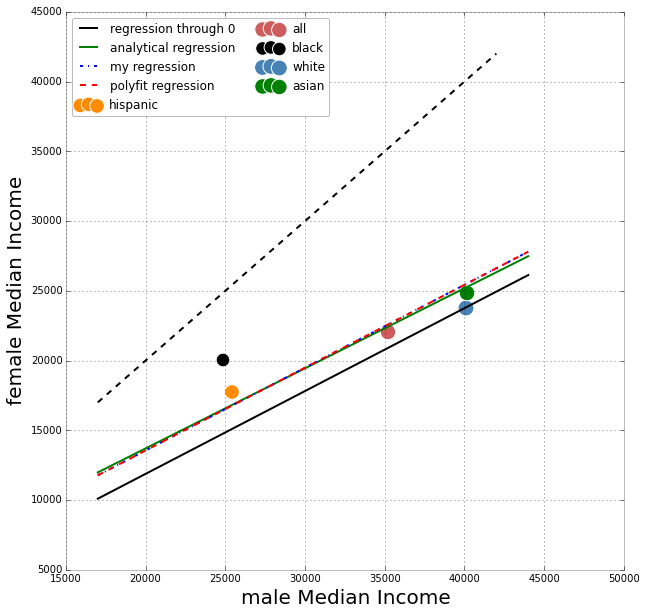

In [26]:
pl.figure(figsize=(10,10))
for k in col.iterkeys():
    pl.scatter(allmales[k]['Median income'][1],allfemales[k]['Median income'][1],s=150*allmales[k]['Median income'][1]/allfemales[k]['Median income'][1],c=col[k],label=k)
    
from scipy import stats
from scipy.optimize import minimize

##set up regression: make array of incomes for all groups, each ethnic group is a datapoint
all_males=np.array([0.,allmales['all']['Median income'][1],allmales['white']['Median income'][1],allmales['black']['Median income'][1],allmales['hispanic']['Median income'][1],allmales['asian']['Median income'][1]])
all_females=np.array([0.,allfemales['all']['Median income'][1],allfemales['white']['Median income'][1],allfemales['black']['Median income'][1],allfemales['hispanic']['Median income'][1],allfemales['asian']['Median income'][1]])


pl.plot([17000,42000],[17000,42000],'k--')
pl.xlabel('male Median Income',fontsize=20)
pl.ylabel('female Median Income',fontsize=20)

#one way to fit: with numpy polyfit
m,b = np.polyfit(all_males, all_females, 1) 

#another way os to minimize the residuals
stline = lambda a,x,y: sum((a*x-y)**2)
result = minimize(stline, m, args=(all_males, all_females))
stline_non0 = lambda a,x,y: sum((a[0]*x+a[1]-y)**2)
par0 = [m,b]
result_non0 = minimize(stline_non0, par0, args=(all_males, all_females))

#this is the analytical best regression line. it can be proved (ask me about it if you want!)
cor = stats.spearmanr(all_males, all_females)
all_males.std()/all_females.std()
beta1=cor[0]*all_females.std()/all_males.std()
beta0=all_females.mean()-beta1*all_males.mean()

print "Slope:  %.2f, %.2f, %.2f %.2f"%(m, result.x, result_non0.x[0], beta1)

pl.plot(range(17000,45000,1000),result.x*np.arange(17000,45000,1000),'k', lw = 2, label="regression through 0")
pl.plot(range(17000,45000,1000),beta0+beta1*np.arange(17000,45000,1000),'g', lw = 2, label="analytical regression")
pl.plot(range(17000,45000,1000),result_non0.x[1]+result_non0.x[0]*np.arange(17000,45000,1000),'b-.', lw = 2, label="my regression")
pl.plot(range(17000,45000,1000),b+m*np.arange(17000,45000,1000),'r--', lw = 2, label="polyfit regression")

pl.legend(loc=2, ncol=2)

Slope:  0.59, 0.59, 0.59 0.56


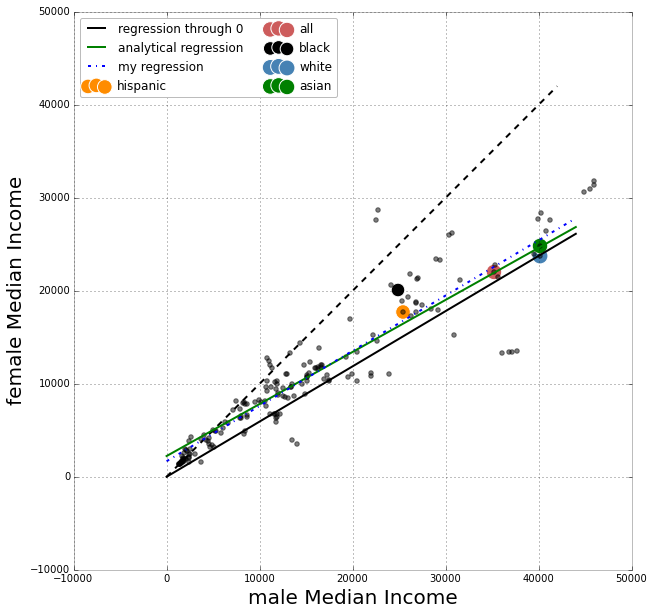

In [28]:
pl.figure(figsize=(10,10))
for k in col.iterkeys():
    pl.scatter(allmales[k]['Median income'][1],allfemales[k]['Median income'][1],s=150*allmales[k]['Median income'][1]/allfemales[k]['Median income'][1],c=col[k],label=k)
    
from scipy import stats
from scipy.optimize import minimize

all_males=np.ma.array(np.concatenate([allmales['all']['Median income'][:].values,allmales['white']['Median income'][:].values,allmales['black']['Median income'][:].values,allmales['hispanic']['Median income'][:].values,allmales['asian']['Median income'][:].values]).flatten())
all_females=np.ma.array(np.concatenate([allfemales['all']['Median income'][:].values,allfemales['white']['Median income'][:].values,allfemales['black']['Median income'][:].values,allfemales['hispanic']['Median income'][:].values,allfemales['asian']['Median income'][:].values]).flatten())

allmask = [np.isnan(all_males) + np.isnan(all_females)]

all_females.mask = allmask
all_males.mask = allmask
#print all_males
pl.scatter(all_males, all_females, color='k', alpha=0.5)

pl.plot([0,42000],[0,42000],'k--')
pl.xlabel('male Median Income',fontsize=20)
pl.ylabel('female Median Income',fontsize=20)


#another way to minimize the residuals
stline = lambda a,x,y: sum((a*x-y)**2)
result = minimize(stline, m, args=(all_males, all_females))
stline_non0 = lambda a,x,y: sum((a[0]*x+a[1]-y)**2)
par0 = [m,b]
result_non0 = minimize(stline_non0, par0, args=(all_males, all_females))

#this is the analytical best regression line. it can be proved (ask me about it if you want!)
cor = stats.spearmanr(all_males, all_females)
all_males.std()/all_females.std()
beta1=cor[0]*all_females.std()/all_males.std()
beta0=all_females.mean()-beta1*all_males.mean()

print "Slope:  %.2f, %.2f, %.2f %.2f"%(m, result.x, result_non0.x[0], beta1)

pl.plot(range(0,45000,1000),result.x*np.arange(0,45000,1000),'k', lw = 2, label="regression through 0")
pl.plot(range(0,45000,1000),beta0+beta1*np.arange(0,45000,1000),'g', lw = 2, label="analytical regression")
pl.plot(range(0,45000,1000),result_non0.x[1]+result_non0.x[0]*np.arange(0,45000,1000),'b-.', lw = 2, label="my regression")

pl.legend(loc=2, ncol=2)

In [29]:
M=(allmales['all'].transpose())[(allmales['all'].transpose()).keys()[1]][2:41]
MW=(allmales['white'].transpose())[(allmales['white'].transpose()).keys()[1]][2:41]
MB=(allmales['black'].transpose())[(allmales['black'].transpose()).keys()[1]][2:41]
MH=(allmales['hispanic'].transpose())[(allmales['hispanic'].transpose()).keys()[1]][2:41]
MA=(allmales['asian'].transpose())[(allmales['asian'].transpose()).keys()[1]][2:41]


F=(allfemales['all'].transpose())[(allfemales['all'].transpose()).keys()[1]][2:41]
FW=(allfemales['white'].transpose())[(allfemales['white'].transpose()).keys()[1]][2:41]
FB=(allfemales['black'].transpose())[(allfemales['black'].transpose()).keys()[1]][2:41]
FH=(allfemales['hispanic'].transpose())[(allfemales['hispanic'].transpose()).keys()[1]][2:41]
FA=(allfemales['asian'].transpose())[(allfemales['asian'].transpose()).keys()[1]][2:41]


In [30]:
mocs={'males':[], 'females':[]}
for gender in ['males','females']:
    for k in col.iterkeys():    
        for j in allmales[k].keys()[3:42]:
        #for i in range(males[k][1])
            inmin=float(j.split()[0].replace('$','').replace(',',''))
            try:
                inmax=float(j.split()[2].replace('$','').replace(',',''))
                dm=inmax-inmin
                if gender=='males':
                    mocs[gender].append(np.random.rand(allmales[k][j][1])*dm + inmin)
                else:
                    mocs[gender].append(np.random.rand(allfemales[k][j][1])*dm + inmin)

            except ValueError:
                inmax = inmin*2
                dm=(inmax-inmin)/2
                if gender=='males':
                    mocs[gender].append(np.abs(np.random.randn(allmales[k][j][1]))*dm + inmin)
                else:
                    mocs[gender].append(np.abs(np.random.randn(allfemales[k][j][1]))*dm + inmin)

    mocs[gender]=np.concatenate(mocs[gender])

(array([  1.75797308e-05,   2.10076070e-05,   2.67769861e-05,
          3.23617874e-05,   3.29313422e-05,   2.43484678e-05,
          2.60571322e-05,   2.47756339e-05,   1.79515236e-05,
          2.37472710e-05,   1.67544037e-05,   1.68335086e-05,
          1.78249558e-05,   1.12961702e-05,   1.88823238e-05,
          1.31234919e-05,   1.05710426e-05,   1.43469800e-05,
          7.92894115e-06,   1.32421491e-05,   1.06817894e-05,
          6.95595169e-06,   1.08189044e-05,   5.70873215e-06,
          9.14451875e-06,   8.84392039e-06,   4.30330294e-06,
          6.56833801e-06,   3.52016509e-06,   5.48460179e-06,
          7.11152453e-06,   2.47598129e-06,   4.49579137e-06,
          3.28285059e-06,   3.36459225e-06,   4.79111608e-06,
          2.38896597e-06,   3.69683255e-06,   2.91633153e-06,
          2.29667700e-06,   3.71001669e-06,   1.59528081e-06,
          1.92224745e-06,   1.58209667e-06,   1.13383595e-06,
          2.03299422e-06,   9.54531658e-07,   9.04431930e-07,
        

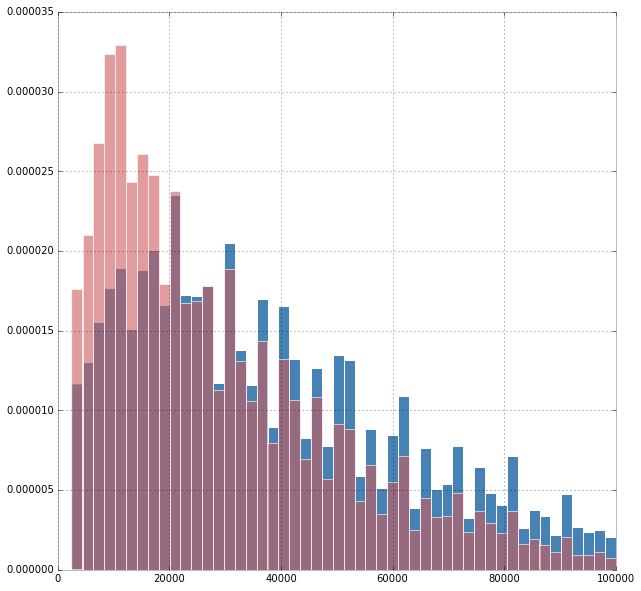

In [31]:
pl.figure(figsize=(10,10))
pl.hist(mocs['males'],normed=True,bins=50,color='SteelBlue')
pl.hist(mocs['females'],normed=True,bins=50,color='IndianRed',alpha=0.6)

In [32]:
from scipy import stats  
      
f_val, p_val = stats.f_oneway(mocs['males'],mocs['females'])  
  
print "One-way ANOVA P =", p_val  
  

One-way ANOVA P = 0.0


Ks_2sampResult(statistic=0.14945910471645701, pvalue=0.0)

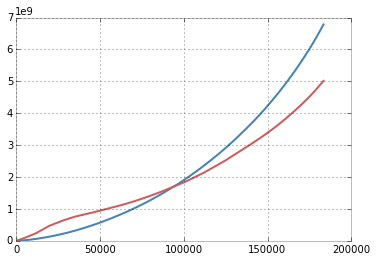

In [33]:
pl.plot(cumsum(mocs['males'][np.argsort(mocs['males'])]),lw=2)
pl.plot(cumsum(mocs['females'][np.argsort(mocs['males'])]),lw=2)
from scipy import stats
stats.ks_2samp(mocs['males'],mocs['females'])

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm


#.... we could do it with anova too
#formula = 'S ~ C(E) + C(M) + X'
#lm = ols(formula, salary_table).fit()
print lm.summary()